In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az

In [39]:
#Set up plotting themes
# sns.set_context('paper')
# sns.set_style('darkgrid')
# sns.set_palette('colorblind')
sns.set_theme(font_scale=1.5, font='serif', context='paper', style='darkgrid', palette='colorblind')

In [64]:
df_clean = pd.read_csv('df_clean_memory.csv').drop(['Unnamed: 0'], axis=1)

In [65]:
df_clean_grouped = df_clean.groupby(['participant', 'block', 'node type', 'condition']).mean(numeric_only=True).reset_index()

/tmp/ipykernel_2297342/1447307647.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.axes[0][0].set_xticklabels(['1', '2', '3'])
/tmp/ipykernel_2297342/1447307647.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.axes[0][1].set_xticklabels(['1', '2', '3'])


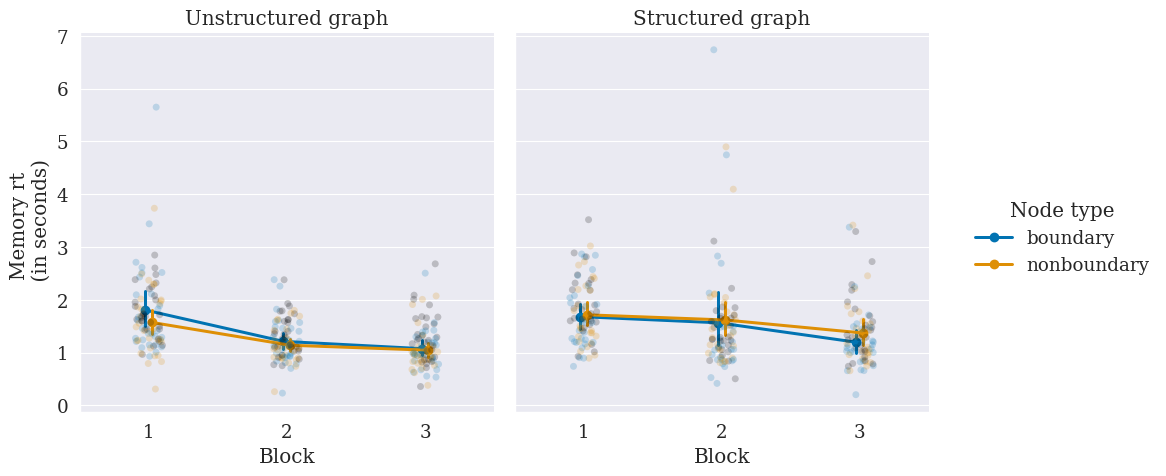

In [66]:
#Specify which measure to be plotted ('accuracy' or 'rt')

measure = 'rt'


g = sns.catplot(
    x = 'block',
    y = measure,
    hue = 'node type', 
    hue_order = ['boundary', 'nonboundary'],# 'new'],
    col = 'condition',
    col_order=['unstructured', 'structured'],
    # estimator='median',
    kind = 'point', 
    margin_titles=True, 
    data = df_clean_grouped, 
    dodge=True
)
sns.stripplot(y = measure, x = 'block', hue = 'node type', hue_order = ['boundary', 'nonboundary'],#, 'new'],
              data = df_clean_grouped.loc[((df_clean_grouped['condition'] == 'unstructured'))], 
              ax=g.axes[0][0], legend=False, alpha = 0.2)
sns.stripplot(y = measure, x = 'block', hue = 'node type', hue_order = ['boundary', 'nonboundary'],#, 'new'],
              data = df_clean_grouped.loc[((df_clean_grouped['condition'] == 'structured'))], 
              ax=g.axes[0][1], legend=False, alpha = 0.2)

# Uncomment the line below for plotting memory to also plot responses for new items
# sns.stripplot(y = measure, x = 'block', hue = 'condition', 
#               data = df_clean_memory_grouped.loc[df_clean_memory_grouped['node type'] == 'new'], 
#               ax=g.axes[0][2], legend=False, alpha = 0.4)

g._legend.set_title('Node type')
g.axes[0][0].set_title('Unstructured graph')
g.axes[0][1].set_title('Structured graph')
# g.axes[0][2].set_title('New Items') #Uncomment for new

# g.axes[0][0].set_ylabel(f'Exposure {measure} \n (proportion correct)')
g.axes[0][0].set_ylabel(f'Memory {measure} \n (in seconds)')
g.axes[0][0].set_xlabel('Block')
g.axes[0][1].set_xlabel('Block')
# g.axes[0][2].set_xlabel('Block') #Uncomment for new


g.axes[0][0].set_xticklabels(['1', '2', '3'])
g.axes[0][1].set_xticklabels(['1', '2', '3'])
# g.axes[0][2].set_xticklabels(['1', '2', '3']) #Uncomment for new

plt.savefig(f'figures/memory_{measure}_boundaryhued.png', dpi = 300)


In [69]:
#Read (best) fit models for structured and unstructured group participants
ddm_model_samples_unstructured = az.from_netcdf(f'model_results/posteriors/hssm_posteriors/unstructured_v~acc_exp-block-nodetype-nodetype_ppt_a~block-_ppt_z~block-_ppt_t~_ppt.nc')

ddm_model_samples_structured = az.from_netcdf(f'model_results/posteriors/hssm_posteriors/structured_v~acc_exp-block-nodetype-nodetype_ppt_a~block-_ppt_z~block-_ppt_t~_ppt.nc')


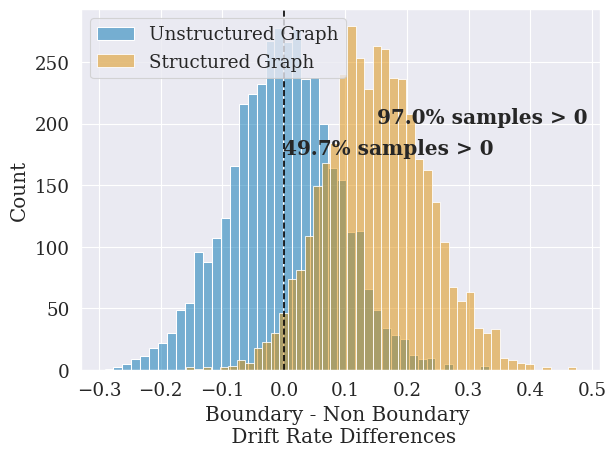

In [70]:

#Read posteriors of boundary/non boundary parameters for both participant groups
bs = ddm_model_samples_structured['posterior'].sel({'v_C(node_type)_dim': 'boundary'})['v_C(node_type)']
nbs = ddm_model_samples_structured['posterior'].sel({'v_C(node_type)_dim': 'nonboundary'})['v_C(node_type)']
bus = ddm_model_samples_unstructured['posterior'].sel({'v_C(node_type)_dim': 'boundary'})['v_C(node_type)']
nbus = ddm_model_samples_unstructured['posterior'].sel({'v_C(node_type)_dim': 'nonboundary'})['v_C(node_type)']

#Plot differences between boundary and non-boundary for both groups
sns.histplot(np.ravel(bus-nbus), alpha = .5, label = 'Unstructured Graph')
sns.histplot(np.ravel(bs - nbs), alpha = .5, label = 'Structured Graph')

plt.axvline(x = 0, ls = '--', color = 'black')
plt.text(x = np.mean(bs-nbs), y = 200, s = f'{str((np.array(np.mean(((bs-nbs)>0))))*100)[:4]}% samples > 0', weight = 'bold')
plt.text(x = np.mean(bus-nbus), y = 175, s = f'{str((np.array(np.mean(((bus-nbus)>0))))*100)[:4]}% samples > 0', weight = 'bold')
plt.legend(loc = 'upper left')
plt.xlabel('Boundary - Non Boundary \n Drift Rate Differences')
plt.tight_layout()
# plt.savefig('figures/ddm_results.png', dpi = 300)